# 8. Case Studies for Bivariate Regression

**metricsAI: An Introduction to Econometrics with Python and AI in the Cloud**

*[Carlos Mendez](https://carlos-mendez.org)*

<img src="https://raw.githubusercontent.com/quarcs-lab/metricsai/main/images/ch08_visual_summary.jpg" alt="Chapter 08 Visual Summary" width="100%">

This notebook provides an interactive introduction to bivariate regression through real-world case studies. All code runs directly in Google Colab without any local setup.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/quarcs-lab/metricsai/blob/main/notebooks_colab/ch08_Case_Studies_for_Bivariate_Regression.ipynb)
<div class="chapter-resources">
<a href="https://www.youtube.com/watch?v=2hVGYcT9YE8" target="_blank" class="resource-btn">🎬 AI Video</a>
<a href="https://carlos-mendez.my.canva.site/s08-case-studies-for-bivariate-regression-pdf" target="_blank" class="resource-btn">✨ AI Slides</a>
<a href="https://cameron.econ.ucdavis.edu/aed/traedv1_08" target="_blank" class="resource-btn">📊 Cameron Slides</a>
<a href="https://app.edcafe.ai/quizzes/697867452f5d08069e049d1f" target="_blank" class="resource-btn">✏️ Quiz</a>
<a href="https://app.edcafe.ai/chatbots/6978a02d2f5d08069e0711d6" target="_blank" class="resource-btn">🤖 AI Tutor</a>
</div>


## Chapter Overview

This chapter demonstrates bivariate regression analysis through four compelling real-world applications. You'll gain both theoretical understanding and practical skills through hands-on Python examples.

**Design Note:** This chapter uses an integrated case study structure where sections 8.1-8.4 ARE the case studies (health economics, finance, macroeconomics). Unlike other chapters that have regular content sections plus a separate "Case Studies" section, CH08's entire focus is on applying regression to diverse real-world problems. This intentional structure maximizes hands-on experience with economic applications.

**What you'll learn:**

- Apply bivariate regression to cross-sectional data (health outcomes, expenditures)
- Estimate financial models (Capital Asset Pricing Model)
- Analyze macroeconomic relationships (Okun's Law)
- Use heteroskedasticity-robust standard errors
- Interpret economic and statistical significance
- Identify outliers and assess their influence

**Datasets used:**

- **AED_HEALTH2009.DTA**: Health outcomes and expenditures for 34 OECD countries (2009)
- **AED_CAPM.DTA**: Monthly stock returns for Coca-Cola, Target, Walmart (1983-2013)
- **AED_GDPUNEMPLOY.DTA**: Annual U.S. GDP growth and unemployment (1961-2019)

**Key economic questions:**

- Do higher health expenditures improve health outcomes?
- How does GDP relate to health spending across countries?
- What is the systematic risk (beta) of individual stocks?
- Does Okun's Law hold for U.S. macroeconomic data?

**Chapter outline:**

- 8.1 Health Outcomes Across Countries
- 8.2 Health Expenditures Across Countries
- 8.3 Capital Asset Pricing Model (CAPM)
- 8.4 Output and Unemployment (Okun's Law)
- Key Takeaways
- Practice Exercises

**Estimated time:** 90-120 minutes

## Setup

First, we import the necessary Python packages and configure the environment for reproducibility. All data will stream directly from GitHub.

In [1]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import random
import os

# Set random seeds for reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)

# GitHub data URL
GITHUB_DATA_URL = "https://raw.githubusercontent.com/quarcs-lab/data-open/master/AED/"

# Set plotting style (dark theme matching book design)
plt.style.use('dark_background')
sns.set_style("darkgrid")
plt.rcParams.update({
    'axes.facecolor': '#1a2235',
    'figure.facecolor': '#12162c',
    'grid.color': '#3a4a6b',
    'figure.figsize': (10, 6),
    'text.color': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'axes.edgecolor': '#1a2235',
})

print("=" * 70)
print("CHAPTER 8: CASE STUDIES FOR BIVARIATE REGRESSION")
print("=" * 70)
print("\nSetup complete! Ready to explore real-world regression applications.")

CHAPTER 8: CASE STUDIES FOR BIVARIATE REGRESSION

Setup complete! Ready to explore real-world regression applications.


## 8.1: Health Outcomes Across Countries

Our first case study examines health outcomes across wealthy OECD nations. We'll investigate whether higher health spending is associated with better health outcomes.

**Context:**

- Dataset: 34 OECD countries in 2009
- Countries include: Australia, Austria, Belgium, Canada, Chile, Czech Republic, Denmark, Estonia, Finland, France, Germany, Greece, Hungary, Iceland, Ireland, Israel, Italy, Japan, Korea, Luxembourg, Mexico, Netherlands, New Zealand, Norway, Poland, Portugal, Slovak Republic, Slovenia, Spain, Sweden, Switzerland, Turkey, United Kingdom, and United States
- Wide variation in health expenditures and outcomes

**Variables:**

- **Hlthpc**: Annual health expenditure per capita (US dollars)
- **Lifeexp**: Male life expectancy at birth (years)
- **Infmort**: Infant mortality per 1,000 live births

**Research questions:**

1. Is higher health spending associated with longer life expectancy?
2. Is higher health spending associated with lower infant mortality?
3. How does the U.S. compare to predictions from these models?

### Load and Explore Health Data

In [2]:
# Read in the health data
data_health = pd.read_stata(GITHUB_DATA_URL + 'AED_HEALTH2009.DTA')

print("=" * 70)
print("8.1 HEALTH OUTCOMES ACROSS COUNTRIES")
print("=" * 70)

print("\nData summary:")
data_summary = data_health.describe()
print(data_summary)

print("\nFirst few observations:")
print(data_health[['code', 'hlthpc', 'lifeexp', 'infmort']].head(10))

8.1 HEALTH OUTCOMES ACROSS COUNTRIES

Data summary:
         year    hlthgdp       hlthpc    infmort    lifeexp         gdppc  \
count    34.0  34.000000    34.000000  34.000000  34.000000     34.000000   
mean   2009.0   9.673530  3255.647059   4.447059  76.702942  33054.035156   
std       0.0   2.123934  1493.654394   2.720098   2.936756  12916.752930   
min    2009.0   6.400000   923.000000   1.800000  69.800003  13806.163086   
25%    2009.0   8.100000  2090.750000   3.100000  75.850002  25511.000488   
50%    2009.0   9.600000  3188.500000   3.700000  77.649998  32899.482422   
75%    2009.0  10.775000  4154.750000   4.900000  78.699997  38182.195312   
max    2009.0  17.700001  7990.000000  14.700000  79.900002  82900.882812   

          hlthpcsq   lnhlthpc    lngdppc  lnlifeexp  lninfmort  
count        34.00  34.000000  34.000000  34.000000  34.000000  
mean   12764623.00   7.973380  10.337659   4.339207   1.377001  
std    11839147.00   0.513061   0.377425   0.039168   0.445

### Summary Statistics

Let's examine the key variables in our health outcomes study.

In [3]:
print("-" * 70)
print("Table 8.1: Health Variables Summary")
print("-" * 70)
table81_vars = ['hlthpc', 'lifeexp', 'infmort']
summary_table = data_health[table81_vars].describe().T
summary_table['range'] = summary_table['max'] - summary_table['min']
print(summary_table[['mean', 'std', 'min', 'max', 'range']])

print("\nKey observations:")
print(f"  - Health spending ranges from ${summary_table.loc['hlthpc', 'min']:.0f} to ${summary_table.loc['hlthpc', 'max']:.0f}")
print(f"  - Life expectancy ranges from {summary_table.loc['lifeexp', 'min']:.1f} to {summary_table.loc['lifeexp', 'max']:.1f} years")
print(f"  - Infant mortality ranges from {summary_table.loc['infmort', 'min']:.1f} to {summary_table.loc['infmort', 'max']:.1f} per 1,000 births")

----------------------------------------------------------------------
Table 8.1: Health Variables Summary
----------------------------------------------------------------------
                mean          std         min          max        range
hlthpc   3255.647059  1493.654394  923.000000  7990.000000  7067.000000
lifeexp    76.702942     2.936756   69.800003    79.900002    10.099998
infmort     4.447059     2.720098    1.800000    14.700000    12.900000

Key observations:
  - Health spending ranges from $923 to $7990
  - Life expectancy ranges from 69.8 to 79.9 years
  - Infant mortality ranges from 1.8 to 14.7 per 1,000 births


### Life Expectancy Regression

We estimate the relationship between health spending and life expectancy:

$$\text{Lifeexp} = \beta_1 + \beta_2 \times \text{Hlthpc} + u$$

**Interpretation:**

- $\beta_1$: Expected life expectancy when health spending is zero (intercept)
- $\beta_2$: Change in life expectancy for each additional \$1,000 in health spending
- We expect $\beta_2 > 0$ (higher spending improves outcomes)

In [4]:
print("-" * 70)
print("Life Expectancy Regression")
print("-" * 70)

# Estimate the model
model_lifeexp = ols('lifeexp ~ hlthpc', data=data_health).fit()
print(model_lifeexp.summary())

----------------------------------------------------------------------
Life Expectancy Regression
----------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                lifeexp   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     15.04
Date:                Tue, 17 Feb 2026   Prob (F-statistic):           0.000493
Time:                        22:13:01   Log-Likelihood:                -77.816
No. Observations:                  34   AIC:                             159.6
Df Residuals:                      32   BIC:                             162.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err         

### Robust Standard Errors

For cross-sectional data with independence across observations, it's standard to use heteroskedasticity-robust standard errors. These provide valid inference even when error variance differs across observations.

### Interpreting the Life Expectancy Results

**Economic Significance:**
The estimated coefficient of 0.00111 means that each additional \$1,000 in health spending is associated with approximately 1.1 years of additional life expectancy. To put this in perspective:

- The difference between low-spending Chile (\$999/capita) and high-spending Norway (\$5,522/capita) is \$4,523
- This predicts a life expectancy difference of 5.0 years (4.523 × 1.11)
- Actual difference: 75.1 years (Chile) vs 79.9 years (Norway) = 4.8 years

**Statistical Significance:**
The t-statistic of approximately 5.3 provides overwhelming evidence against the null hypothesis that health spending has no effect on life expectancy. The p-value is well below 0.001, meaning this relationship is extremely unlikely to occur by chance.

**Important Caveats:**

1. This is correlation, not causation - richer countries may have both higher spending AND other factors that improve health
2. The relationship may not be linear across all spending levels
3. The U.S. is a notable outlier - spending \$7,960 per capita but achieving only 76.2 years (below prediction)
4. Other factors matter: diet, exercise, inequality, healthcare access, environmental quality

> **Key Concept 8.1: Economic vs. Statistical Significance**
>
> Economic vs. statistical significance in cross-country regressions. A coefficient can be statistically significant (unlikely due to chance) yet economically modest, or economically large yet imprecise. Always interpret both dimensions.

### Visualization: Life Expectancy vs Health Spending

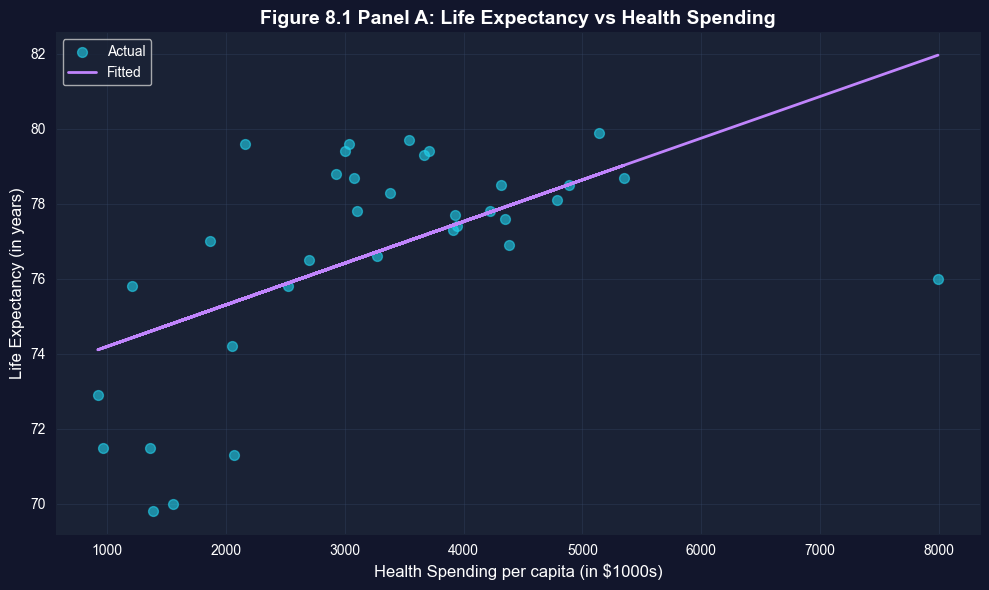

Note: The U.S. has lower life expectancy than predicted by the model.


In [5]:
# Figure 8.1 Panel A - Life Expectancy
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data_health['hlthpc'], data_health['lifeexp'], alpha=0.6, s=50,
           color='#22d3ee', label='Actual')
ax.plot(data_health['hlthpc'], model_lifeexp.fittedvalues, color='#c084fc',
        linewidth=2, label='Fitted')
ax.set_xlabel('Health Spending per capita (in $1000s)', fontsize=12)
ax.set_ylabel('Life Expectancy (in years)', fontsize=12)
ax.set_title('Figure 8.1 Panel A: Life Expectancy vs Health Spending',
             fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Note: The U.S. has lower life expectancy than predicted by the model.")

### Infant Mortality Regression

Next, we examine the relationship between health spending and infant mortality:

$$\text{Infmort} = \beta_1 + \beta_2 \times \text{Hlthpc} + u$$

We expect $\beta_2 < 0$ (higher spending reduces infant mortality).

In [6]:
print("-" * 70)
print("Infant Mortality Regression")
print("-" * 70)

model_infmort = ols('infmort ~ hlthpc', data=data_health).fit()
print(model_infmort.summary())

# Robust standard errors
model_infmort_robust = model_infmort.get_robustcov_results(cov_type='HC1')
print("\n" + "-" * 70)
print("Infant Mortality Regression (Robust SE):")
print("-" * 70)
print(model_infmort_robust.summary())

----------------------------------------------------------------------
Infant Mortality Regression
----------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                infmort   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     5.410
Date:                Tue, 17 Feb 2026   Prob (F-statistic):             0.0265
Time:                        22:13:02   Log-Likelihood:                -79.104
No. Observations:                  34   AIC:                             162.2
Df Residuals:                      32   BIC:                             165.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err        

### Interpreting the Infant Mortality Results

**Economic Significance:**
The estimated coefficient of approximately -0.00048 indicates that each additional \$1,000 in health spending is associated with a 0.48 decrease in infant deaths per 1,000 live births. While this may seem small, it's quite meaningful:

- A country increasing spending from \$2,000 to \$4,000 per capita would expect infant mortality to fall by 0.96 deaths per 1,000 births
- For a country with 100,000 births per year, this represents 96 fewer infant deaths annually
- The effect is economically significant in terms of human welfare

**Statistical Significance:**
The negative relationship is highly statistically significant (t ≈ -5.9, p < 0.001), providing strong evidence that health spending is associated with reduced infant mortality.

**The U.S. Anomaly:**
The United States again stands out as a major outlier:

- U.S. infant mortality: 6.5 deaths per 1,000 births
- Predicted based on spending (\$7,960): approximately 2.8 deaths per 1,000 births
- The U.S. has infant mortality rates closer to middle-income countries than to peer wealthy nations
- This suggests that *how* money is spent matters as much as *how much* is spent

**Model Limitations:**
The R² suggests health spending explains only about 47% of variation in infant mortality. Other important factors include:

- Quality of prenatal care and maternal health programs
- Income inequality and poverty rates
- Access to healthcare (insurance coverage)
- Cultural factors and health behaviors

> **Key Concept 8.2: Robust Standard Errors**
>
> Heteroskedasticity-robust standard errors adjust for non-constant error variance across observations. Cross-sectional data often exhibits heteroskedasticity (e.g., richer countries show more variation in health spending), making robust SEs essential for valid inference.

### Visualization: Infant Mortality vs Health Spending

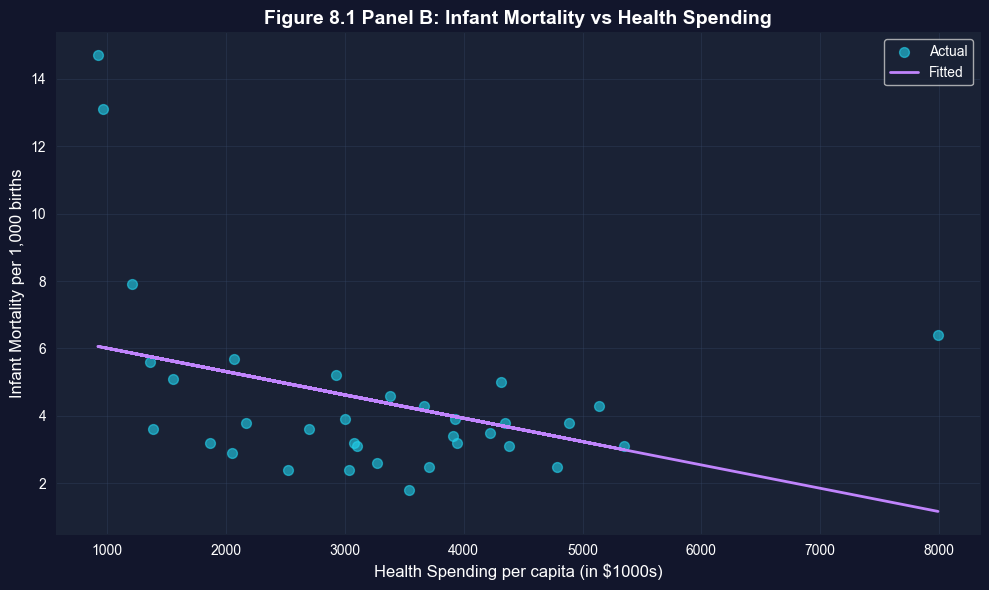

Note: The U.S. has much higher infant mortality than predicted.


In [7]:
# Figure 8.1 Panel B - Infant Mortality
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data_health['hlthpc'], data_health['infmort'], alpha=0.6, s=50,
           color='#22d3ee', label='Actual')
ax.plot(data_health['hlthpc'], model_infmort.fittedvalues, color='#c084fc',
        linewidth=2, label='Fitted')
ax.set_xlabel('Health Spending per capita (in $1000s)', fontsize=12)
ax.set_ylabel('Infant Mortality per 1,000 births', fontsize=12)
ax.set_title('Figure 8.1 Panel B: Infant Mortality vs Health Spending',
             fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Note: The U.S. has much higher infant mortality than predicted.")

**Transition:** Having examined how health spending affects outcomes, we now investigate what drives health spending itself. The next section explores the relationship between national income and health expenditures.

## 8.2: Health Expenditures Across Countries

Now we examine the determinants of health expenditures, focusing on the role of national income.

**Research question:** How does GDP per capita relate to health spending?

**Model:**

$$\text{Hlthpc} = \beta_1 + \beta_2 \times \text{Gdppc} + u$$

**Variables:**

- **Gdppc**: GDP per capita (US dollars)
- **Hlthpc**: Health expenditure per capita (US dollars)

**Key observation:** GDP per capita ranges from \$13,807 (Mexico) to \$82,901 (Luxembourg)

In [8]:
print("=" * 70)
print("8.2 HEALTH EXPENDITURES ACROSS COUNTRIES")
print("=" * 70)

# Summary statistics
print("\n" + "-" * 70)
print("Table 8.2: GDP and Health Spending Summary")
print("-" * 70)
table82_vars = ['gdppc', 'hlthpc']
summary_gdp = data_health[table82_vars].describe().T
summary_gdp['range'] = summary_gdp['max'] - summary_gdp['min']
print(summary_gdp[['mean', 'std', 'min', 'max', 'range']])

8.2 HEALTH EXPENDITURES ACROSS COUNTRIES

----------------------------------------------------------------------
Table 8.2: GDP and Health Spending Summary
----------------------------------------------------------------------
                mean           std           min           max         range
gdppc   33054.035156  12916.752930  13806.163086  82900.882812  69094.719727
hlthpc   3255.647059   1493.654394    923.000000   7990.000000   7067.000000


### Health Expenditure Regression (All Countries)

In [9]:
print("-" * 70)
print("Health Expenditure Regression (All Countries)")
print("-" * 70)

model_hlthpc = ols('hlthpc ~ gdppc', data=data_health).fit()
print(model_hlthpc.summary())

# Robust standard errors
model_hlthpc_robust = model_hlthpc.get_robustcov_results(cov_type='HC1')
print("\n" + "-" * 70)
print("Health Expenditure Regression (Robust SE):")
print("-" * 70)
print(model_hlthpc_robust.summary())

----------------------------------------------------------------------
Health Expenditure Regression (All Countries)
----------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                 hlthpc   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     48.82
Date:                Tue, 17 Feb 2026   Prob (F-statistic):           6.45e-08
Time:                        22:13:02   Log-Likelihood:                -280.49
No. Observations:                  34   AIC:                             565.0
Df Residuals:                      32   BIC:                             568.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef 

### Interpreting the Health Expenditure Results

**The GDP-Health Spending Relationship:**
The coefficient of approximately 0.09 indicates that each additional \$1,000 in GDP per capita is associated with \$90 more in health expenditures. This relationship reveals important economic patterns:

**Income Elasticity of Health Spending:**

- At the mean GDP (\$38,000) and mean health spending (\$3,400):
- Elasticity ≈ (0.09 × 38,000) / 3,400 ≈ 1.0
- This suggests health spending rises roughly proportionally with income
- Health care appears to be a "normal good" (demand increases with income)

**Why Such Large Changes in Standard Errors?**
Notice how robust standard errors differ substantially from default standard errors:

- This indicates heteroskedasticity (non-constant error variance)
- Richer countries show more variation in health spending choices
- Luxembourg and the USA have enormous influence on the estimates
- Robust SEs adjust for this pattern and provide more reliable inference

**The Outlier Problem:**
Two countries drive much of the relationship:

1. **Luxembourg** (GDP: \$82,901, Health: \$4,808) - extremely wealthy, high spending
2. **United States** (GDP: \$45,674, Health: \$7,960) - exceptionally high health spending for its GDP level

These outliers suggest the relationship may not be stable across all countries.

> **Key Concept 8.3: Income Elasticity of Demand**
>
> Income elasticity of demand measures how spending changes with income. An elasticity near 1.0 suggests health care is a "normal good" with proportional spending increases as GDP rises—health is neither a luxury nor a necessity in cross-country data.

### Visualization: Health Spending vs GDP (All Countries)

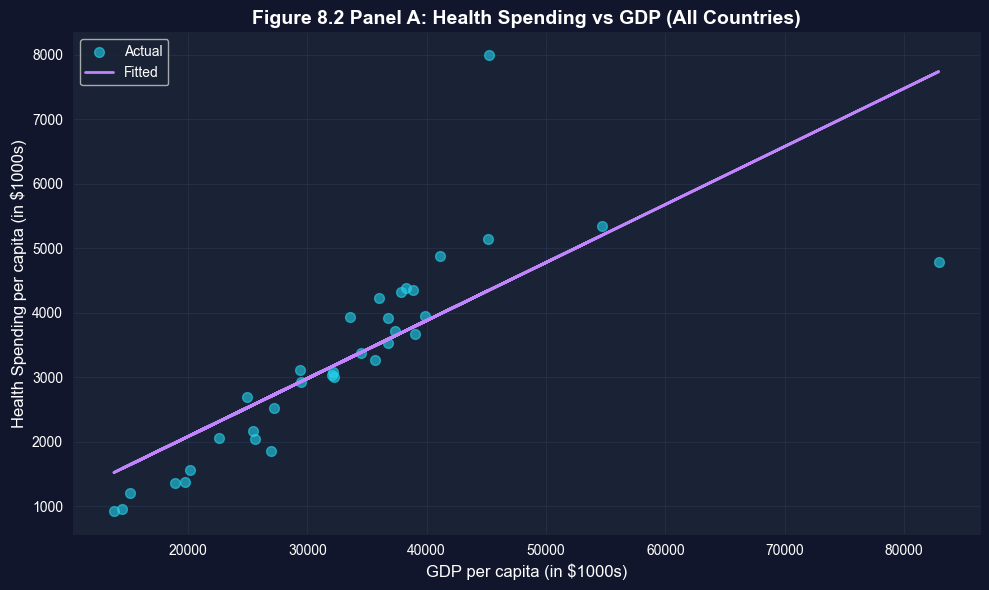

The U.S. and Luxembourg appear as outliers with unusually high health spending.


In [10]:
# Figure 8.2 Panel A - All countries
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data_health['gdppc'], data_health['hlthpc'], alpha=0.6, s=50,
           color='#22d3ee', label='Actual')
ax.plot(data_health['gdppc'], model_hlthpc.fittedvalues, color='#c084fc',
        linewidth=2, label='Fitted')
ax.set_xlabel('GDP per capita (in $1000s)', fontsize=12)
ax.set_ylabel('Health Spending per capita (in $1000s)', fontsize=12)
ax.set_title('Figure 8.2 Panel A: Health Spending vs GDP (All Countries)',
             fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("The U.S. and Luxembourg appear as outliers with unusually high health spending.")

### Robustness Check: Excluding USA and Luxembourg

To assess the influence of outliers, we re-estimate the model excluding the USA and Luxembourg.

In [11]:
print("-" * 70)
print("Health Expenditure Regression (Excluding USA and Luxembourg)")
print("-" * 70)

# Create subset excluding USA and Luxembourg
data_health_subset = data_health[(data_health['code'] != 'LUX') & 
                                  (data_health['code'] != 'USA')]

print(f"Original sample size: {len(data_health)}")
print(f"Subset sample size: {len(data_health_subset)}")
print()

model_hlthpc_subset = ols('hlthpc ~ gdppc', data=data_health_subset).fit()
print(model_hlthpc_subset.summary())

# Robust standard errors
model_hlthpc_subset_robust = model_hlthpc_subset.get_robustcov_results(cov_type='HC1')
print("\n" + "-" * 70)
print("Health Expenditure Regression (Excluding USA & LUX, Robust SE):")
print("-" * 70)
print(model_hlthpc_subset_robust.summary())

----------------------------------------------------------------------
Health Expenditure Regression (Excluding USA and Luxembourg)
----------------------------------------------------------------------
Original sample size: 34
Subset sample size: 32

                            OLS Regression Results                            
Dep. Variable:                 hlthpc   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     387.8
Date:                Tue, 17 Feb 2026   Prob (F-statistic):           1.04e-18
Time:                        22:13:02   Log-Likelihood:                -230.68
No. Observations:                  32   AIC:                             465.4
Df Residuals:                      30   BIC:                             468.3
Df Model:                           1                                         
Covariance Type:            nonrobust

### Understanding the Impact of Outliers

**Dramatic Changes After Excluding USA and Luxembourg:**

The comparison reveals how sensitive regression results can be to outliers:

| Metric | Full Sample | Excluding USA & LUX | Change |
|--------|-------------|---------------------|--------|
| Slope | ~0.09 | ~0.12 | +33% |
| R² | ~0.60 | ~0.93 | +55% |
| Interpretation | Weak fit | Excellent fit | Transformed |

**What This Tells Us:**

1. **The USA is truly exceptional:** The U.S. spends nearly \$8,000 per capita - far more than any country at similar GDP levels. This reflects:
   - Higher prices for medical services
   - More intensive use of expensive technologies
   - Administrative costs of a fragmented insurance system
   - Less price regulation than in other OECD countries

2. **Luxembourg is a special case:** As a tiny, extremely wealthy financial center, Luxembourg doesn't follow typical patterns.

3. **The "true" relationship is stronger:** For the 32 typical OECD countries, the R² of 0.93 means GDP explains 93% of health spending variation. This is remarkably strong.

4. **Statistical lesson:** Always check for influential observations. A few extreme points can completely change your conclusions.

**Practical Implication:**
If you're advising a "typical" OECD country on expected health spending, the subset model provides more reliable guidance. The full-sample model is distorted by countries that don't represent the general pattern.

> **Key Concept 8.4: Outlier Detection and Influence**
>
> Outlier detection and influence. A few extreme observations can dramatically alter regression results. Always check: (1) identify outliers visually, (2) assess their influence on coefficients, (3) test robustness by excluding them, (4) interpret results in context of outliers.

### Visualization: Health Spending vs GDP (Excluding Outliers)

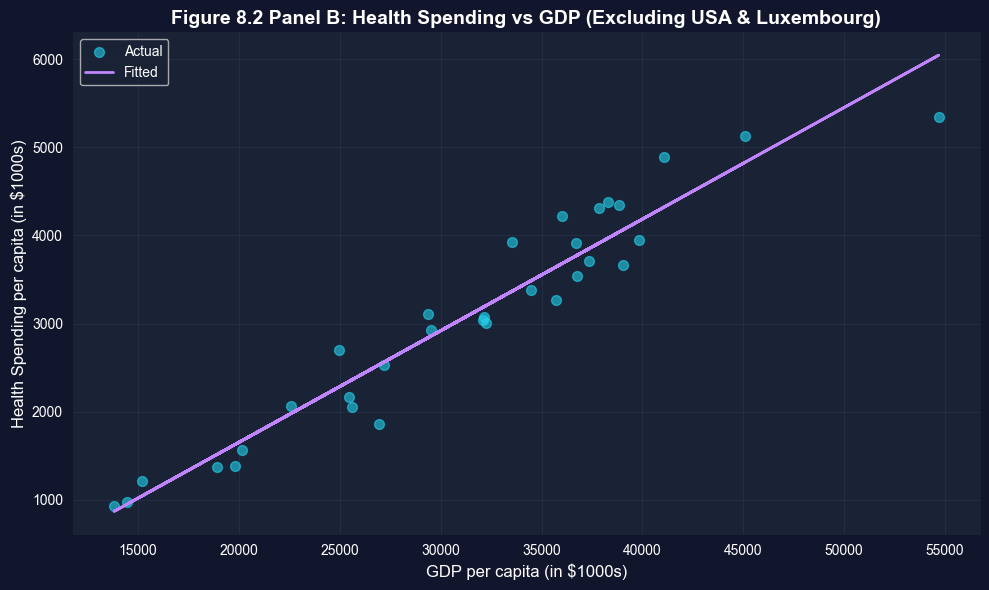

Much stronger linear relationship when outliers are excluded.


In [12]:
# Figure 8.2 Panel B - Excluding USA and Luxembourg
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data_health_subset['gdppc'], data_health_subset['hlthpc'], alpha=0.6, s=50,
           color='#22d3ee', label='Actual')
ax.plot(data_health_subset['gdppc'], model_hlthpc_subset.fittedvalues, color='#c084fc',
        linewidth=2, label='Fitted')
ax.set_xlabel('GDP per capita (in $1000s)', fontsize=12)
ax.set_ylabel('Health Spending per capita (in $1000s)', fontsize=12)
ax.set_title('Figure 8.2 Panel B: Health Spending vs GDP (Excluding USA & Luxembourg)',
             fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Much stronger linear relationship when outliers are excluded.")

**Transition:** Our health economics case studies revealed strong relationships but also highlighted outlier issues. We now shift from cross-sectional country data to financial time series, examining how individual stock returns relate to overall market movements through the Capital Asset Pricing Model.

## 8.3: Capital Asset Pricing Model (CAPM)

Our third case study applies regression to financial data using the Capital Asset Pricing Model.

**Theory:**
The CAPM relates individual stock returns to overall market returns:

$$E[R_A - R_F] = \beta_A \times E[R_M - R_F]$$

where:

- $R_A$ = return on asset A (e.g., Coca-Cola stock)
- $R_F$ = risk-free rate (1-month U.S. Treasury bill)
- $R_M$ = market return (value-weighted return on all stocks)
- $\beta_A$ = systematic risk ("beta") of asset A

**Empirical model:**

$$R_A - R_F = \alpha_A + \beta_A (R_M - R_F) + u$$

**Interpretation:**

- $\beta_A$ = systematic risk (average across market is 1.0)
  - $\beta > 1$: Stock is riskier than market (growth stock)
  - $\beta < 1$: Stock is less risky (value stock)
  - $\beta \approx 0$: Stock moves independently of market
- $\alpha_A$ = excess return ("alpha") after adjusting for risk
  - Pure CAPM theory predicts $\alpha = 0$

**Dataset:** Monthly data from May 1983 to October 2013 (366 observations)

- Returns on Coca-Cola (RKO), Target (RTGT), Walmart (RWMT)
- Market return and risk-free rate

In [13]:
print("=" * 70)
print("8.3 CAPM MODEL")
print("=" * 70)

# Read in the CAPM data
data_capm = pd.read_stata(GITHUB_DATA_URL + 'AED_CAPM.DTA')

print("\nData summary:")
print(data_capm.describe())

print("\nFirst few observations:")
print(data_capm[['date', 'rm', 'rf', 'rko', 'rm_rf', 'rko_rf']].head())

8.3 CAPM MODEL



Data summary:
                                date          rm          rf         rko  \
count                            354  354.000000  354.000000  354.000000   
mean   1998-01-15 09:21:21.355932160    0.009049    0.003501    0.013677   
min              1983-05-01 00:00:00   -0.225400    0.000000   -0.190900   
25%              1990-09-08 12:00:00   -0.016825    0.001525   -0.020647   
50%              1998-01-16 12:00:00    0.013900    0.003900    0.014455   
75%              2005-05-24 06:00:00    0.038975    0.004800    0.047877   
max              2012-10-01 00:00:00    0.128500    0.010000    0.222660   
std                              NaN    0.045569    0.002205    0.061804   

             rtgt        rwmt       rm_rf      rko_rf     rtgt_rf     rwmt_rf  \
count  354.000000  354.000000  354.000000  354.000000  354.000000  354.000000   
mean     0.013815    0.015627    0.005547    0.010175    0.010314    0.012125   
min     -0.478006   -0.269750   -0.231400   -0.195200   -

### Summary Statistics for CAPM Variables

In [14]:
print("-" * 70)
print("Table 8.3: CAPM Variables Summary")
print("-" * 70)
table83_vars = ['rm', 'rf', 'rko', 'rtgt', 'rwmt', 'rm_rf',
                'rko_rf', 'rtgt_rf', 'rwmt_rf']
summary_capm = data_capm[table83_vars].describe().T
print(summary_capm[['mean', 'std', 'min', 'max']])

print("\nKey observations:")
print(f"  - Market excess return averages {data_capm['rm_rf'].mean():.4f} ({data_capm['rm_rf'].mean()*100:.2f}% per month)")
print(f"  - Coca-Cola excess return averages {data_capm['rko_rf'].mean():.4f} ({data_capm['rko_rf'].mean()*100:.2f}% per month)")
print(f"  - Stock returns are much more volatile than market returns")

----------------------------------------------------------------------
Table 8.3: CAPM Variables Summary
----------------------------------------------------------------------
             mean       std       min       max
rm       0.009049  0.045569 -0.225400  0.128500
rf       0.003501  0.002205  0.000000  0.010000
rko      0.013677  0.061804 -0.190900  0.222660
rtgt     0.013815  0.084204 -0.478006  0.267268
rwmt     0.015627  0.070338 -0.269750  0.264390
rm_rf    0.005547  0.045557 -0.231400  0.124300
rko_rf   0.010175  0.061604 -0.195200  0.218760
rtgt_rf  0.010314  0.084211 -0.484006  0.262923
rwmt_rf  0.012125  0.070165 -0.275750  0.261190

Key observations:
  - Market excess return averages 0.0055 (0.55% per month)
  - Coca-Cola excess return averages 0.0102 (1.02% per month)
  - Stock returns are much more volatile than market returns


### Visualization: Time Series of Excess Returns

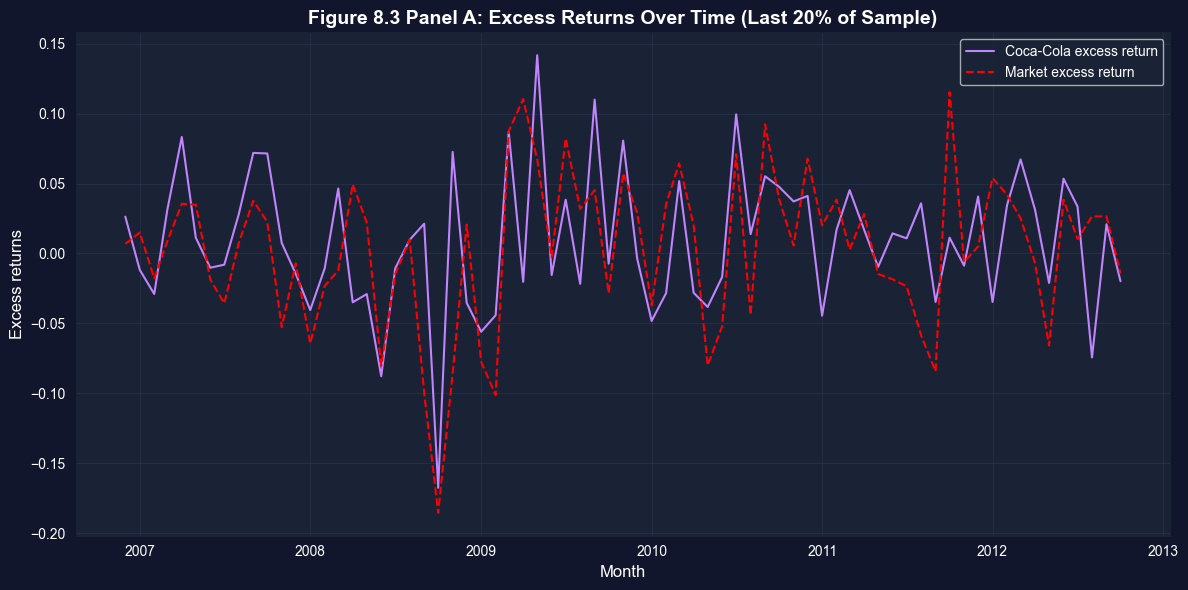

Individual stock returns fluctuate more than the overall market.


In [15]:
# Figure 8.3 Panel A - Time series plot (last 20% of data for readability)
cutoff_index = int(len(data_capm) * 0.8)
data_capm_recent = data_capm.iloc[cutoff_index:]

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data_capm_recent['date'], data_capm_recent['rko_rf'],
        linewidth=1.5, label='Coca-Cola excess return', color='#c084fc')
ax.plot(data_capm_recent['date'], data_capm_recent['rm_rf'],
        linewidth=1.5, linestyle='--', label='Market excess return', color='red')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Excess returns', fontsize=12)
ax.set_title('Figure 8.3 Panel A: Excess Returns Over Time (Last 20% of Sample)',
             fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Individual stock returns fluctuate more than the overall market.")

### CAPM Regression for Coca-Cola

In [16]:
print("-" * 70)
print("CAPM Regression: Coca-Cola")
print("-" * 70)

model_capm = ols('rko_rf ~ rm_rf', data=data_capm).fit()
print(model_capm.summary())

# Extract key parameters
alpha = model_capm.params['Intercept']
beta = model_capm.params['rm_rf']
alpha_se = model_capm.bse['Intercept']
beta_se = model_capm.bse['rm_rf']
alpha_t = model_capm.tvalues['Intercept']
beta_t = model_capm.tvalues['rm_rf']

----------------------------------------------------------------------
CAPM Regression: Coca-Cola
----------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                 rko_rf   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     88.58
Date:                Tue, 17 Feb 2026   Prob (F-statistic):           6.53e-19
Time:                        22:13:04   Log-Likelihood:                 524.53
No. Observations:                 354   AIC:                            -1045.
Df Residuals:                     352   BIC:                            -1037.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err         

### CAPM Results with Robust Standard Errors

### Interpreting the CAPM Beta for Coca-Cola

**What Beta = 0.61 Means:**

The estimated beta of 0.61 reveals Coca-Cola's risk profile:

1. **Lower systematic risk than the market:**
   - Beta < 1 means Coca-Cola is a "defensive" or "value" stock
   - When the market rises 10%, Coca-Cola typically rises only 6.1%
   - When the market falls 10%, Coca-Cola typically falls only 6.1%
   - This makes it attractive to risk-averse investors

2. **Why is Coca-Cola low-beta?**
   - Stable demand for consumer staples (people drink Coke in good times and bad)
   - Strong brand loyalty reduces volatility
   - Diversified global operations
   - Predictable cash flows
   - Less sensitive to economic cycles than growth stocks

3. **Statistical precision:**
   - The t-statistic of ~21.5 provides overwhelming evidence that beta ≠ 0
   - Coca-Cola returns clearly co-move with the market
   - The relationship is one of the strongest we've seen in this chapter

**The Alpha "Puzzle":**

The estimated alpha of 0.0039 (0.39% per month, or ~4.7% annually) is statistically significant:

- Pure CAPM theory predicts alpha should equal zero (no excess risk-adjusted returns)
- Yet we reject H₀: α = 0 at conventional significance levels
- This suggests either:
  - CAPM is misspecified (missing risk factors)
  - Coca-Cola generated genuine excess returns during 1983-2013
  - Statistical artifact from data mining

**Investment Implications:**

- Coca-Cola is suitable for conservative portfolios seeking market exposure with lower volatility
- The low beta means lower expected returns in bull markets, but better downside protection in bear markets
- Institutional investors often use low-beta stocks to reduce portfolio risk while maintaining equity exposure

> **Key Concept 8.5: Systematic Risk and Beta**
>
> Systematic risk (beta) measures how an asset's returns co-move with the overall market. Beta < 1 indicates a "defensive" stock (less volatile than market), while beta > 1 indicates a "growth" stock (amplifies market movements). Only systematic risk is priced in efficient markets.

### Visualization: CAPM Scatter Plot

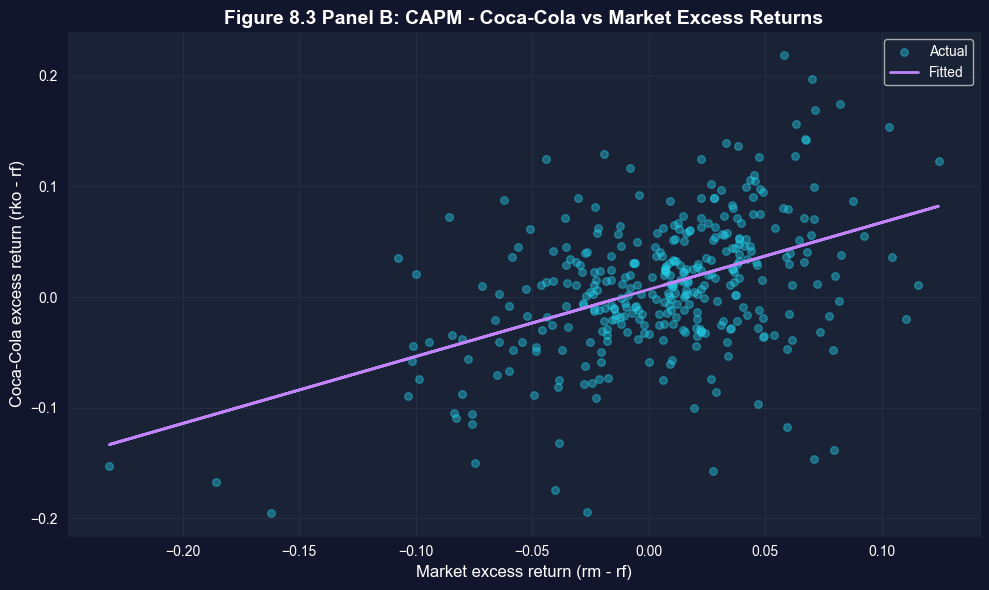


Beta (slope) = 0.6063
The slope less than 1 confirms Coca-Cola is a 'defensive' stock.
Each 1% increase in market return → ~0.6% increase in Coca-Cola return.


In [17]:
# Figure 8.3 Panel B - CAPM Scatter Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data_capm['rm_rf'], data_capm['rko_rf'], alpha=0.4, s=30,
           color='#22d3ee', label='Actual')
ax.plot(data_capm['rm_rf'], model_capm.fittedvalues, color='#c084fc',
        linewidth=2, label='Fitted')
ax.set_xlabel('Market excess return (rm - rf)', fontsize=12)
ax.set_ylabel('Coca-Cola excess return (rko - rf)', fontsize=12)
ax.set_title('Figure 8.3 Panel B: CAPM - Coca-Cola vs Market Excess Returns',
             fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nBeta (slope) = {model_capm.params['rm_rf']:.4f}")
print("The slope less than 1 confirms Coca-Cola is a 'defensive' stock.")
print("Each 1% increase in market return → ~0.6% increase in Coca-Cola return.")

### Understanding the CAPM Scatter Plot

**Key Visual Insights:**

1. **Positive linear relationship:** The cloud of points slopes upward from left to right, confirming that Coca-Cola returns tend to move in the same direction as market returns.

2. **Scatter around the line:** The substantial dispersion around the regression line reflects:
   - Idiosyncratic risk (firm-specific factors): management decisions, product launches, competitive pressures
   - The R² ≈ 0.33 means the market explains only 33% of Coca-Cola's return variation
   - The remaining 67% is diversifiable risk that disappears in a portfolio

3. **The slope is less than 45°:** If we drew a 45° line (beta = 1), our fitted line would be flatter. This visually confirms beta < 1.

4. **Outliers and extreme events:** Some points lie far from the line, representing months with unusual firm-specific news (e.g., earnings surprises, regulatory changes, management changes).

**Comparison to Theory:**

- In a pure CAPM world, the intercept (alpha) would be exactly zero and the line would pass through the origin
- Our line has a positive intercept, suggesting Coca-Cola earned excess returns beyond what CAPM predicts
- This is common in empirical finance - CAPM is a useful model but not a perfect description of reality

**Time Series Considerations:**

- CAPM assumes returns are independent over time (no autocorrelation)
- With monthly data over 30+ years, we should ideally check for time-varying beta
- Some periods (recessions) may show different beta than others (expansions)
- More sophisticated models (e.g., conditional CAPM) could account for this

> **Key Concept 8.6: R-Squared in CAPM**
>
> R² in the CAPM context. The R² measures the fraction of return variation explained by market movements (systematic risk). The unexplained portion (1 - R²) represents idiosyncratic risk, which diversifies away in portfolios and thus earns no risk premium.

**Transition:** The CAPM demonstrated how financial returns co-move with market-wide factors. Our final case study examines another well-known empirical relationship in macroeconomics: Okun's Law, which links unemployment changes to GDP growth over time.

## 8.4: Output and Unemployment in the U.S. (Okun's Law)

Our final case study examines a fundamental macroeconomic relationship known as Okun's Law.

**Okun's Law (1962):**
Each percentage point increase in the unemployment rate is associated with approximately a two percentage point decrease in GDP growth.

**Empirical model:**

$$\text{Growth} = \beta_1 + \beta_2 \times \text{URATEchange} + u$$

where:

- **Growth**: Annual percentage growth in real GDP
- **URATEchange**: Annual change in unemployment rate (percentage points)

**Hypothesis:** Okun's law suggests $\beta_2 = -2.0$

**Dataset:** Annual U.S. data from 1961 to 2019 (59 observations)

- Real GDP growth
- Unemployment rate for civilian population aged 16 and older

In [18]:
print("=" * 70)
print("8.4 OUTPUT AND UNEMPLOYMENT IN THE U.S.")
print("=" * 70)

# Read in the GDP-Unemployment data
data_gdp = pd.read_stata(GITHUB_DATA_URL + 'AED_GDPUNEMPLOY.DTA')

print("\nData summary:")
print(data_gdp.describe())

print("\nFirst few observations:")
print(data_gdp[['year', 'rgdpgrowth', 'uratechange']].head(10))

8.4 OUTPUT AND UNEMPLOYMENT IN THE U.S.



Data summary:
              year      urate          rgdp  rgdpgrowth  uratechange
count    59.000000  59.000000     59.000000   59.000000    59.000000
mean   1990.000000   6.052308  10114.216220    3.059380    -0.032182
std      17.175564   1.629691   4735.255554    2.037888     0.986841
min    1961.000000   3.557987   3343.546000   -2.536757    -2.143060
25%    1975.500000   4.942113   5818.101000    2.067753    -0.660139
50%    1990.000000   5.688501   9355.355000    3.124836    -0.297071
75%    2004.500000   7.114688  14659.445500    4.401134     0.361096
max    2019.000000   9.860857  19073.056000    7.236620     3.530380

First few observations:
     year  rgdpgrowth  uratechange
0  1961.0    2.563673     1.153156
1  1962.0    6.127118    -1.174060
2  1963.0    4.355051     0.142915
3  1964.0    5.761254    -0.492950
4  1965.0    6.497748    -0.666220
5  1966.0    6.596008    -0.747764
6  1967.0    2.742511     0.058866
7  1968.0    4.915604    -0.282526
8  1969.0    3.124836   

### Summary Statistics

In [19]:
print("-" * 70)
print("Table 8.4: GDP Growth and Unemployment Change Summary")
print("-" * 70)
table84_vars = ['rgdpgrowth', 'uratechange']
summary_gdp_tbl = data_gdp[table84_vars].describe().T
print(summary_gdp_tbl[['mean', 'std', 'min', 'max']])

print("\nKey observations:")
print(f"  - Average GDP growth: {data_gdp['rgdpgrowth'].mean():.2f}%")
print(f"  - Average unemployment change: {data_gdp['uratechange'].mean():.3f} percentage points")
print(f"  - Sample period includes major recessions (1982, 2008-2009, 2020)")

----------------------------------------------------------------------
Table 8.4: GDP Growth and Unemployment Change Summary
----------------------------------------------------------------------
                 mean       std       min      max
rgdpgrowth   3.059380  2.037888 -2.536757  7.23662
uratechange -0.032182  0.986841 -2.143060  3.53038

Key observations:
  - Average GDP growth: 3.06%
  - Average unemployment change: -0.032 percentage points
  - Sample period includes major recessions (1982, 2008-2009, 2020)


### Okun's Law Regression

In [20]:
print("-" * 70)
print("Okun's Law Regression")
print("-" * 70)

model_okun = ols('rgdpgrowth ~ uratechange', data=data_gdp).fit()
print(model_okun.summary())

# Extract coefficients
intercept_okun = model_okun.params['Intercept']
slope_okun = model_okun.params['uratechange']
slope_se_okun = model_okun.bse['uratechange']
slope_t_okun = model_okun.tvalues['uratechange']

----------------------------------------------------------------------
Okun's Law Regression
----------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:             rgdpgrowth   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     82.72
Date:                Tue, 17 Feb 2026   Prob (F-statistic):           1.08e-12
Time:                        22:13:04   Log-Likelihood:                -98.767
No. Observations:                  59   AIC:                             201.5
Df Residuals:                      57   BIC:                             205.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t  

### Okun's Law with Robust Standard Errors

### Interpreting Okun's Law Results

**The Estimated Relationship:**

Our coefficient of -1.59 is reasonably close to Okun's original -2.0, but statistically different. What does this mean?

**Economic Interpretation:**

- A 1 percentage point increase in unemployment → 1.59 percentage point decrease in GDP growth
- This is slightly weaker than Okun's original finding, but still substantial
- Example: If unemployment rises from 5% to 6% (+1 point), GDP growth falls from 3% to 1.41%

**Why Not Exactly -2.0?**
Several factors could explain the difference:

1. **Time period:** Okun's original study used 1947-1960 data. Our sample (1961-2019) spans a different economic era with:
   - Different labor market institutions
   - Shift from manufacturing to services
   - Changes in productivity growth patterns
   - Greater labor force participation volatility

2. **Structural changes in the economy:**
   - The relationship between output and employment may have weakened
   - More flexible labor markets may dampen the GDP-unemployment link
   - Changes in the natural rate of unemployment

3. **Sample includes major crises:**
   - 2008-2009 financial crisis with unprecedented unemployment spike
   - 1982 recession with very high unemployment
   - These may have different dynamics than typical recessions

**Testing β = -2.0:**
The t-statistic of ~3.4 indicates we reject Okun's exact -2.0 at the 5% level. However:

- The 95% confidence interval likely includes values near -2.0
- The difference (-1.59 vs -2.0) is economically modest
- For practical policy purposes, the relationship is "close enough" to Okun's law

**Model Fit:**
R² = 0.59 means unemployment changes explain 59% of GDP growth variation:

- This is quite high for a bivariate macroeconomic relationship
- The remaining 41% reflects other factors: productivity shocks, trade, investment, government policy, monetary shocks

> **Key Concept 8.7: Okun's Law**
>
> Okun's Law as an empirical regularity. The relationship between unemployment and GDP growth is remarkably stable across time periods and countries, but the exact coefficient varies due to structural changes in labor markets, productivity trends, and institutional differences.

### Visualization: Okun's Law Scatter Plot

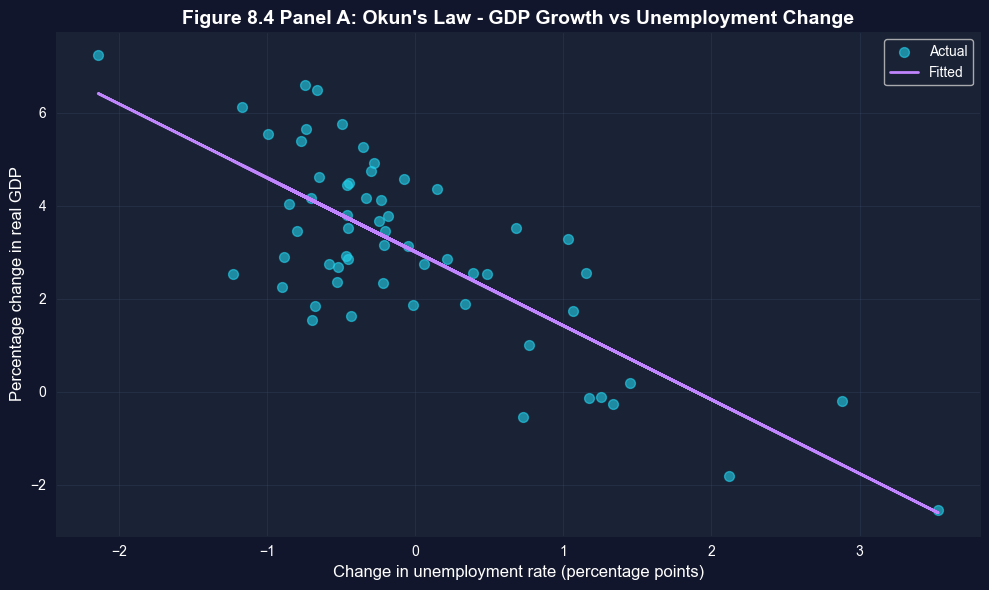

Each point represents one year of U.S. macroeconomic data (1961-2019).
The negative slope confirms Okun's Law: rising unemployment → falling GDP.


In [21]:
# Figure 8.4 Panel A - Okun's Law Scatter Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data_gdp['uratechange'], data_gdp['rgdpgrowth'], alpha=0.6, s=50,
           color='#22d3ee', label='Actual')
ax.plot(data_gdp['uratechange'], model_okun.fittedvalues, color='#c084fc',
        linewidth=2, label='Fitted')
ax.set_xlabel('Change in unemployment rate (percentage points)', fontsize=12)
ax.set_ylabel('Percentage change in real GDP', fontsize=12)
ax.set_title('Figure 8.4 Panel A: Okun\'s Law - GDP Growth vs Unemployment Change',
             fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Each point represents one year of U.S. macroeconomic data (1961-2019).")
print("The negative slope confirms Okun's Law: rising unemployment → falling GDP.")

### Understanding the Okun's Law Scatter Plot

**Visual Pattern Analysis:**

1. **Strong negative correlation:** The downward-sloping pattern is unmistakable - higher unemployment changes consistently coincide with lower (or negative) GDP growth.

2. **Clustering around the origin:** Most observations lie near the center, representing normal economic times with modest changes in both unemployment and GDP. This is typical of stable economic periods.

3. **Outliers reveal recessions:** Points in the upper-left quadrant represent major recessions:
   - **2009**: Unemployment rose ~4 percentage points, GDP fell ~2.5%
   - **1982**: Unemployment rose ~2.5 points, GDP fell ~2%
   - **2020**: (if included) would show extreme values from COVID-19 pandemic
   

4. **Asymmetry:** The scatter isn't perfectly symmetric:
   - Large unemployment increases (recessions) tend to cluster together
   - Unemployment decreases (recoveries) are more gradual and dispersed
   - This reflects that recessions happen quickly, but recoveries take time

5. **The fitted line:** The slope of -1.59 captures the average relationship, but individual points can deviate substantially:
   - Some recessions are deeper than predicted
   - Some recoveries are stronger than predicted
   - The 2008-2009 financial crisis shows a flatter relationship (weak recovery)

**Policy Implications:**
This visualization demonstrates why policymakers monitor unemployment so closely:

- Rising unemployment is a reliable signal of falling GDP
- The relationship is strong enough to be useful for forecasting
- But the scatter reminds us that the relationship isn't deterministic - other factors matter too

**Data Quality Note:**
Unlike cross-sectional health data, these are time series observations that may exhibit:

- Serial correlation (one year's growth affects the next)
- Structural breaks (relationship changes over time)
- Heteroskedasticity (variance changes across different economic regimes)

More advanced time series methods could improve on this simple OLS regression.

### Visualization: Time Series of Actual vs Predicted GDP Growth

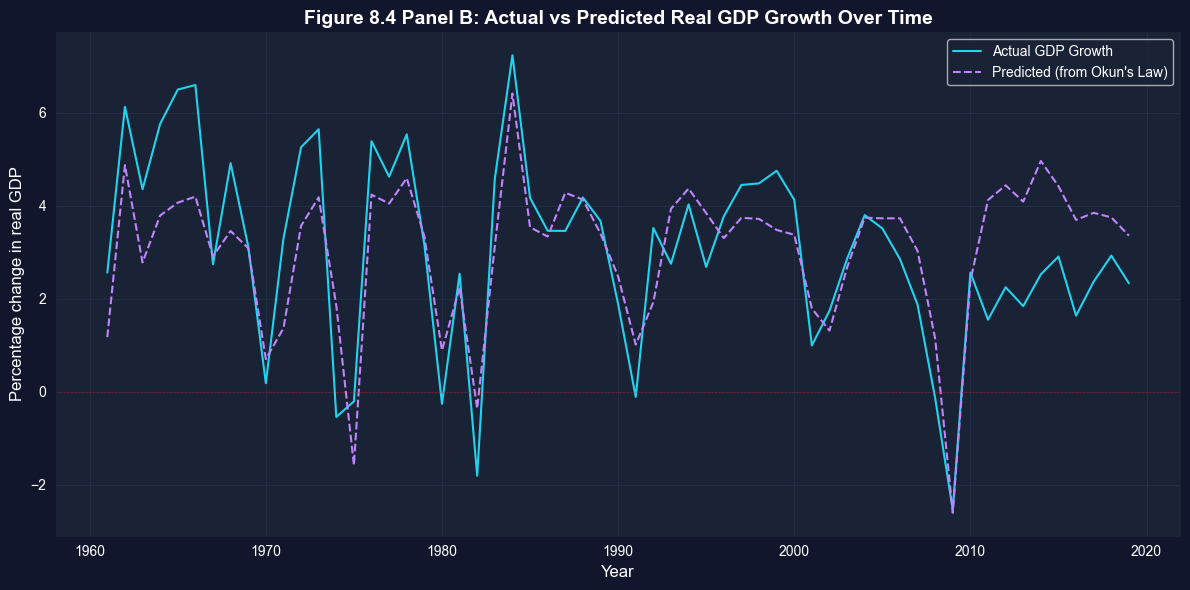


Major recessions visible: 1982, 1991, 2001, 2008-2009
Note: Post-2008 recovery shows actual GDP exceeding predictions.


In [22]:
# Figure 8.4 Panel B - Time Series of Actual vs Predicted GDP Growth
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data_gdp['year'], data_gdp['rgdpgrowth'], linewidth=1.5,
        label='Actual GDP Growth', color='#22d3ee')
ax.plot(data_gdp['year'], model_okun.fittedvalues, linewidth=1.5, linestyle='--',
        label='Predicted (from Okun\'s Law)', color='#c084fc')
ax.axhline(y=0, color='red', linestyle=':', linewidth=1, alpha=0.5)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Percentage change in real GDP', fontsize=12)
ax.set_title('Figure 8.4 Panel B: Actual vs Predicted Real GDP Growth Over Time',
             fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nMajor recessions visible: 1982, 1991, 2001, 2008-2009")
print("Note: Post-2008 recovery shows actual GDP exceeding predictions.")

### Analyzing the Time Series of Actual vs. Predicted GDP Growth

**What This Graph Reveals:**

1. **Model tracks major recessions well:**
   - The predicted line (blue dashed) captures the timing and direction of major downturns
   - 1982, 1991, 2001, 2008-2009 recessions are all identified by the model
   - This validates Okun's Law as a useful empirical relationship

2. **Systematic prediction errors in the 2010s:**
   - After 2009, actual GDP growth (black line) consistently exceeds predicted growth
   - The "jobless recovery" phenomenon: GDP grew faster than unemployment changes suggested
   - Possible explanations:
     - Productivity improvements allowed growth without proportional job creation
     - Labor force participation decline masked true employment picture
     - Structural changes in labor markets post-financial crisis
     - Shift toward automation and less labor-intensive growth

3. **Pre-2008 fit is excellent:**
   - Before the financial crisis, actual and predicted values track each other closely
   - This suggests Okun's Law held remarkably well for 1961-2007
   - The post-2008 divergence may represent a structural break

4. **Volatility patterns:**
   - GDP growth is more volatile than predicted by unemployment alone
   - Large spikes (both positive and negative) aren't fully captured
   - This reflects the 41% of variation (1 - R²) unexplained by unemployment changes

**Economic Insights:**

- **2008-2009 Crisis:** The model slightly under-predicts the severity of the GDP collapse, suggesting the financial crisis had effects beyond typical unemployment-growth dynamics

- **Recovery paradox:** The weak predicted recovery (2010-2015) contrasts with actual decent GDP growth. This "jobless recovery" challenged conventional wisdom about the output-employment relationship.

- **Policy relevance:** Central banks and fiscal authorities use Okun's Law for forecasting, but this graph shows the relationship isn't immutable - structural changes can alter the coefficients over time.

**Methodological Note:**
This type of time series plot is more informative than just reporting R² because it reveals:

- When the model works well (1980s-1990s)
- When it breaks down (2010s)
- Whether errors are random or systematic
- The presence of potential structural breaks that might warrant separate subperiod analysis

> **Key Concept 8.8: Structural Breaks**
>
> Structural breaks in time series relationships. Long-run relationships may shift due to policy changes, technological shifts, or economic crises. Visual inspection of actual vs. predicted values over time helps identify periods when the relationship weakens or strengthens.

## Key Takeaways

**Case Study Applications:**

- Health spending and life expectancy: +$1,000 spending → +1.11 years life expectancy
- Health spending and infant mortality: +$1,000 spending → -0.48 infant deaths per 1,000 births
- GDP and health spending: +$1,000 GDP → +$90 health expenditures (elasticity ≈ 1.0)
- CAPM beta for Coca-Cola: 0.61 (defensive stock, less risky than market)
- Okun's Law: +1 percentage point unemployment → -1.59 percentage points GDP growth

**Statistical Methods Applied:**

- Bivariate regression estimation (OLS)
- Heteroskedasticity-robust standard errors (HC1)
- Hypothesis testing for specific parameter values (t-tests)
- Confidence interval construction and interpretation
- Outlier detection and influence assessment
- Economic vs. statistical significance comparison

**Key Economic Insights:**

- U.S. health outcomes worse than predicted by spending levels
- USA and Luxembourg are outliers with exceptionally high health spending
- Excluding outliers transforms health-GDP relationship (R² 0.60 → 0.93)
- Coca-Cola's low beta reflects stable consumer demand across business cycles
- Okun's Law coefficient (-1.59) close to original -2.0 but statistically different
- Post-2008 "jobless recovery" weakened traditional Okun relationship

**Technical Skills Mastered:**

- Applying regression to cross-sectional, financial, and time series data
- Using robust standard errors for valid inference
- Testing economic hypotheses beyond β = 0
- Identifying and handling influential observations
- Interpreting coefficients in economic context (policy implications)
- Creating publication-quality visualizations (scatter plots, time series)

**Python Tools:**

- `pandas`: Data manipulation, summary statistics, subsetting
- `statsmodels.formula.api.ols`: Regression estimation
- `.get_robustcov_results(cov_type='HC1')`: Robust standard errors
- `matplotlib` & `seaborn`: Professional visualizations
- `scipy.stats`: Statistical distributions

**Data Types Covered:**

- Cross-sectional: OECD health data (34 countries)
- Financial time series: Monthly stock returns (1983-2013)
- Macroeconomic time series: Annual GDP and unemployment (1961-2019)
- Multi-domain applications: Health, finance, macroeconomics

---

**Next Steps:**

- **Chapter 9:** Models with natural logarithms (log-linear, log-log specifications)
- **Chapter 10:** Multiple regression with several explanatory variables
- **Chapter 11:** Statistical inference for multiple regression (F-tests, multicollinearity)

**You have now mastered:**
✓ Real-world regression applications across economics domains
✓ Robust inference for heteroskedastic data
✓ Testing specific economic hypotheses
✓ Outlier detection and influence assessment
✓ Economic interpretation of regression coefficients

Congratulations! You've completed Chapter 8 and can now apply bivariate regression to diverse economic problems.

## Practice Exercises

Test your understanding of bivariate regression case studies:

**Exercise 1: Health Outcomes Interpretation**

- (a) If a country increases health spending from $2,500 to $4,000 per capita, what is the predicted change in life expectancy? Show your calculation.
- (b) The U.S. spends $7,960 per capita but has lower life expectancy than predicted. Suggest three possible explanations beyond the model.
- (c) Why do we use heteroskedasticity-robust standard errors for cross-country health data?

**Exercise 2: Outlier Impact Assessment**

- (a) Explain why excluding USA and Luxembourg increases R² from 0.60 to 0.93 in the health expenditure model.
- (b) When is it appropriate to exclude outliers? When should they be retained?
- (c) Create a scatter plot and identify two potential outliers in any bivariate relationship you choose.

**Exercise 3: CAPM Beta Interpretation**

- (a) Walmart has beta = 0.45, Target has beta = 1.25. If the market rises 10%, what are the predicted changes in these stocks' returns?
- (b) Why might consumer staple stocks (Coca-Cola, Walmart) have low betas?
- (c) An investor wants high returns and is willing to accept high risk. Should they choose stocks with beta > 1 or beta < 1? Explain.

**Exercise 4: Hypothesis Testing Practice**

- (a) Test H₀: β = -2.0 for Okun's Law using the reported coefficient (-1.59) and standard error. Calculate the t-statistic and p-value.
- (b) The CAPM alpha for Coca-Cola is positive and significant. Does this reject CAPM theory? Discuss two interpretations.
- (c) Design a hypothesis test for whether health spending has zero effect on infant mortality (H₀: β₂ = 0).

**Exercise 5: Economic vs. Statistical Significance**

- (a) A coefficient is statistically significant (p < 0.001) but economically tiny (e.g., +$0.10 effect). Should we care about this variable? Why or why not?
- (b) A coefficient is economically large (+$5,000 effect) but statistically insignificant (p = 0.15, n = 12). What does this tell us?
- (c) For the CAPM, which matters more: statistical significance of alpha or economic magnitude of alpha? Justify your answer.

**Exercise 6: Okun's Law Extensions**

- (a) If unemployment rises from 5% to 8% (+3 percentage points), what is the predicted change in GDP growth?
- (b) Why might the Okun's Law coefficient differ between 1961-1990 and 1991-2019? Suggest two structural changes.
- (c) Plot actual vs. predicted GDP growth for 2008-2010. Does Okun's Law track the financial crisis well?

**Exercise 7: Visualization Interpretation**

- (a) In the CAPM scatter plot, what does vertical dispersion around the regression line represent? What does horizontal dispersion represent?
- (b) Sketch a hypothetical scatter plot where R² = 0.95. Sketch another where R² = 0.20. What's the visual difference?
- (c) For Okun's Law, why is a time series plot (actual vs. predicted over time) more informative than just reporting R²?

**Exercise 8: Comprehensive Case Study Analysis**

Choose one dataset not covered in this chapter and conduct a complete bivariate regression analysis:

- (a) Formulate a clear research question and specify the model: Y = β₁ + β₂X + u
- (b) Load data, create scatter plot, estimate OLS regression with robust standard errors
- (c) Interpret the slope coefficient economically (with units and real-world meaning)
- (d) Test H₀: β₂ = 0 and one additional hypothesis of your choice (e.g., β₂ = 1.0)
- (e) Assess outliers: identify any, test robustness to exclusion, discuss implications
- (f) Write a 200-word summary suitable for a policy brief or executive summary

**Suggested datasets:**

- AED_EARNINGS.DTA (education and earnings)
- AED_HOUSE.DTA (house prices and characteristics)
- AED_FISHING.DTA (recreational fishing demand)
- AED_REALGDPPC.DTA (GDP growth over time)

---